# Data Exploration and Preprocessing:

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

In [2]:
# Load the dataset
df = pd.read_csv('blogs_categories.csv')

# Exploratory Data Analysis
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [3]:
df['Labels'].value_counts()

Labels
alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: count, dtype: int64

In [5]:
# Preprocessing
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['Data'] = df['Data'].apply(preprocess)

[nltk_data] Downloading package stopwords to C:\Users\Prashant
[nltk_data]     Chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
# Feature Extraction
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Data'])
y = df['Labels']

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Model for Text Classification:

In [8]:
# Train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [9]:
# Make predictions
y_pred = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.89825
Precision: 0.8972627064744374
Recall: 0.89825
F1-Score: 0.8966626938015397


### Hypertuning

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Initialize the Naive Bayes model
nb = MultinomialNB()

# Set up GridSearchCV
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.9044196623944984


Accuracy: 0.9025
Precision: 0.9018350265201835
Recall: 0.9025
F1-Score: 0.9014934958494563
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.76      0.75       173
           comp.graphics       0.83      0.91      0.87       179
 comp.os.ms-windows.misc       0.95      0.88      0.92       226
comp.sys.ibm.pc.hardware       0.85      0.86      0.86       204
   comp.sys.mac.hardware       0.90      0.95      0.93       205
          comp.windows.x       0.96      0.94      0.95       186
            misc.forsale       0.91      0.79      0.85       190
               rec.autos       0.91      0.96      0.93       203
         rec.motorcycles       1.00      0.98      0.99       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.92      0.97      0.95       200
         sci.electronics   

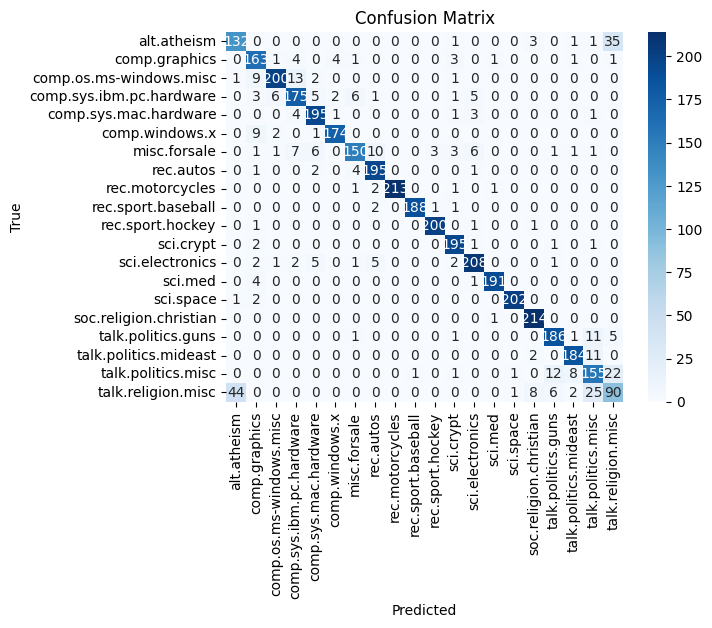

In [22]:
# Use the best model to make predictions
best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(X_test)

# Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_nb.classes_, yticklabels=best_nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Sentiment Analysis:

In [10]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['Sentiment'] = df['Data'].apply(get_sentiment)

# Distribution of sentiments
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_distribution)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism               0.285000      NaN  0.715000
comp.graphics             0.263000    0.001  0.736000
comp.os.ms-windows.misc   0.259000      NaN  0.741000
comp.sys.ibm.pc.hardware  0.255000    0.002  0.743000
comp.sys.mac.hardware     0.274000      NaN  0.726000
comp.windows.x            0.282000    0.005  0.713000
misc.forsale              0.231000      NaN  0.769000
rec.autos                 0.254000    0.002  0.744000
rec.motorcycles           0.345000      NaN  0.655000
rec.sport.baseball        0.312000    0.001  0.687000
rec.sport.hockey          0.347000    0.001  0.652000
sci.crypt                 0.264000      NaN  0.736000
sci.electronics           0.252000      NaN  0.748000
sci.med                   0.282000    0.002  0.716000
sci.space                 0.276000    0.001  0.723000
soc.religion.christian    0.232698      NaN  0.767302
talk.politics.guns        0.